In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


There is no missing values as count is 1436 for all columns.


In [6]:
df=df.drop(["Cylinders"], axis=1) #since column cylinder is having only one value for all rows

<Axes: >

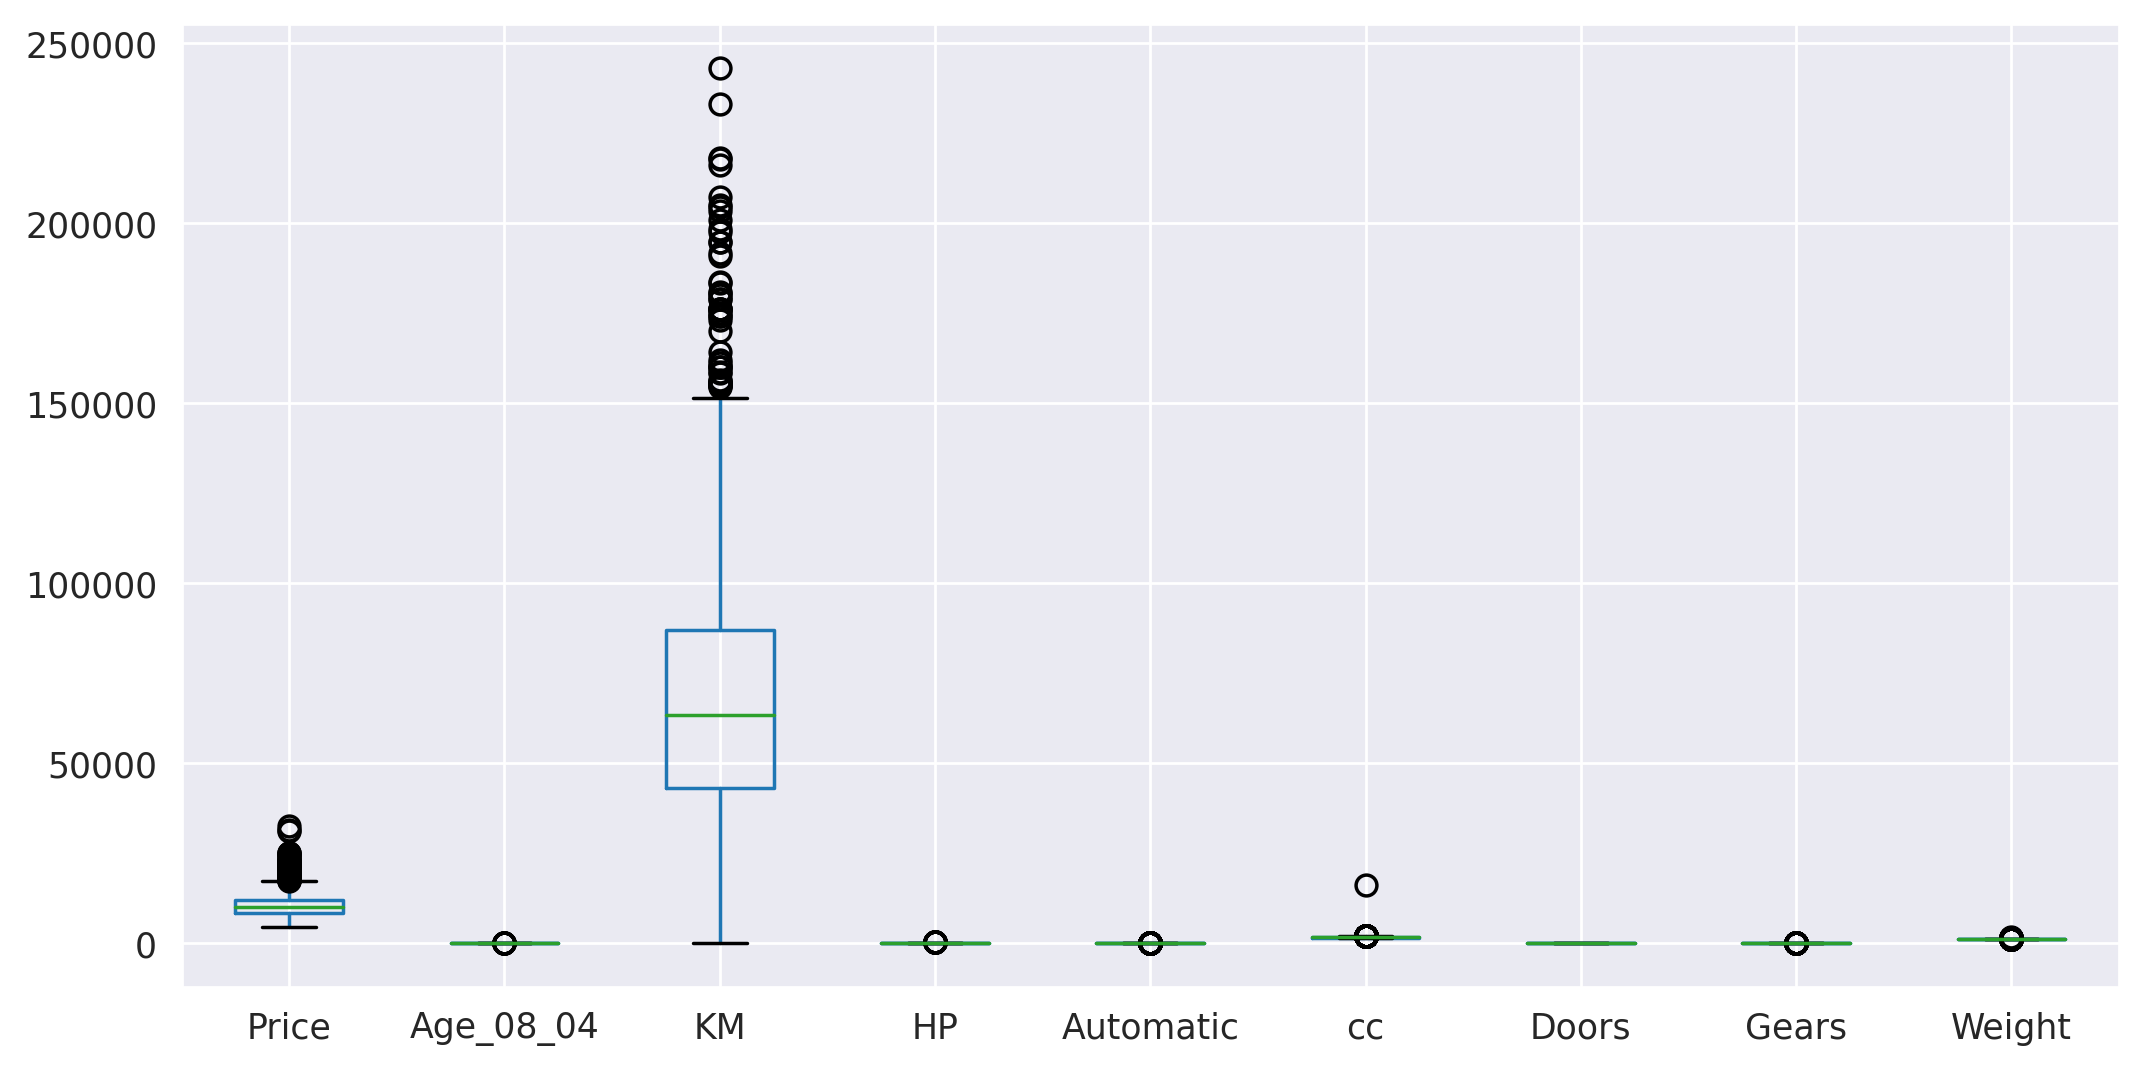

In [7]:
df.boxplot()

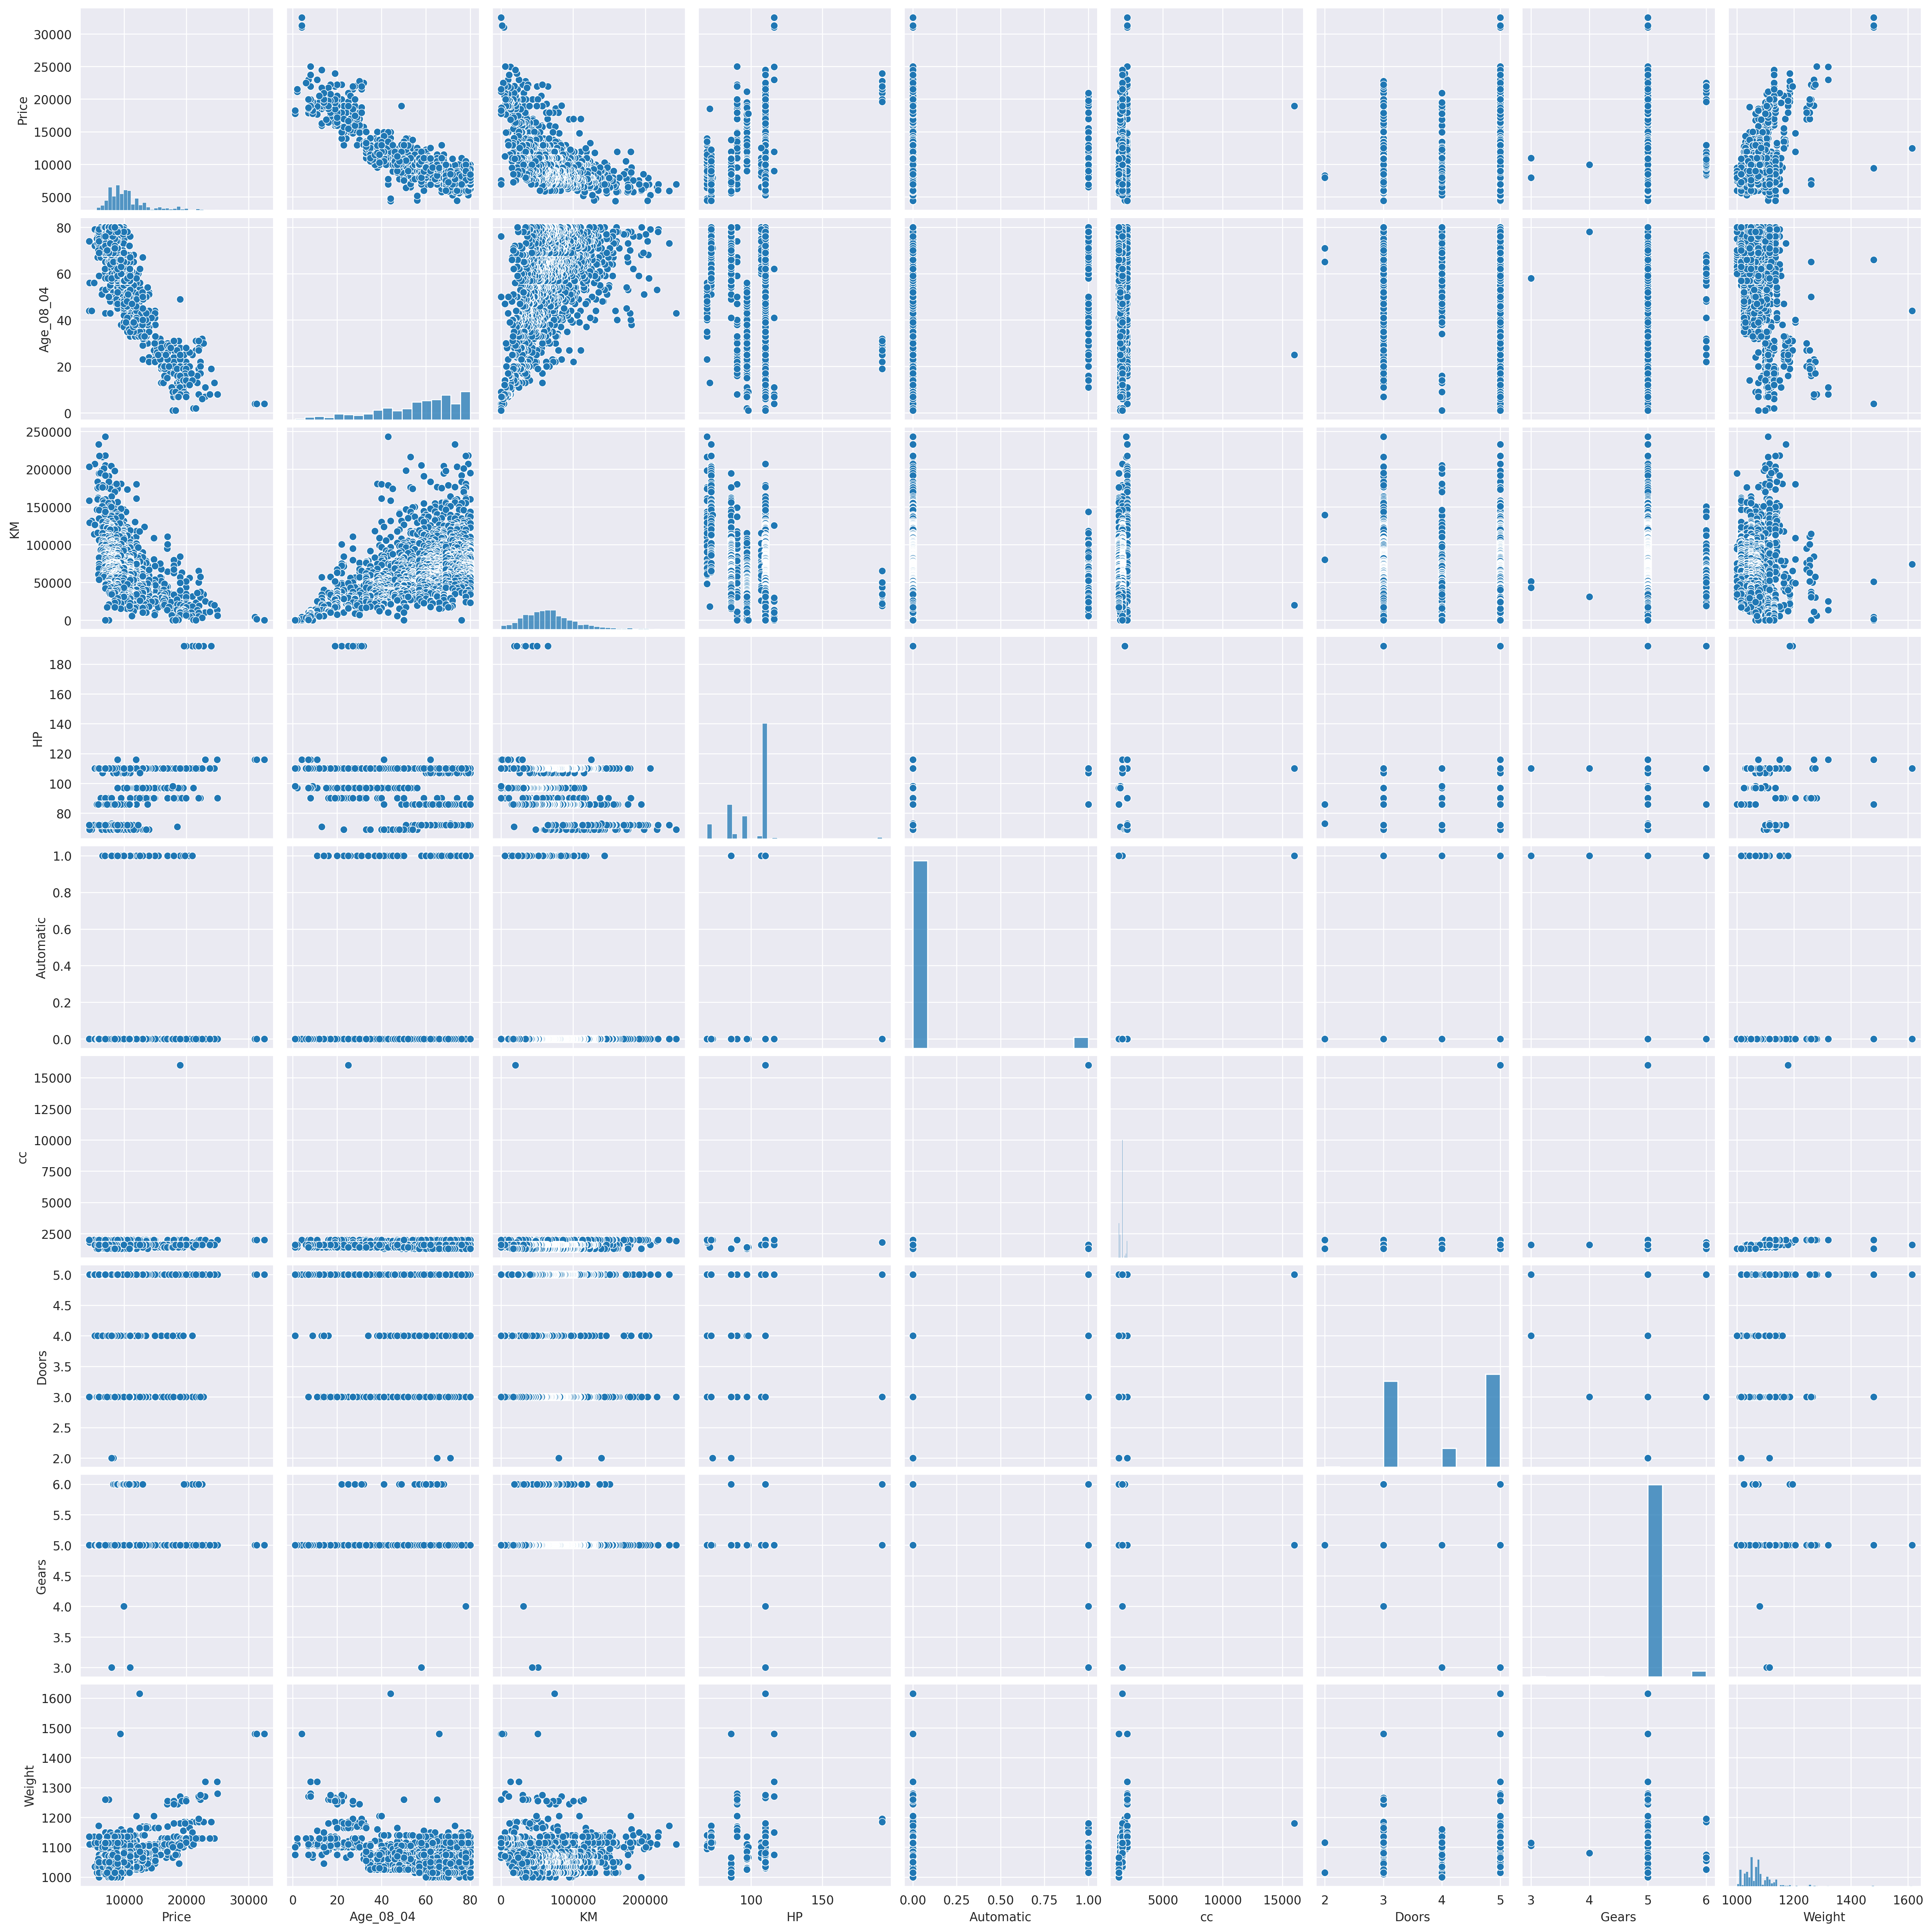

In [8]:
sns.pairplot(df)

In [9]:
df=pd.get_dummies(df, columns = ['Fuel_Type'], dtype=int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


<Axes: >

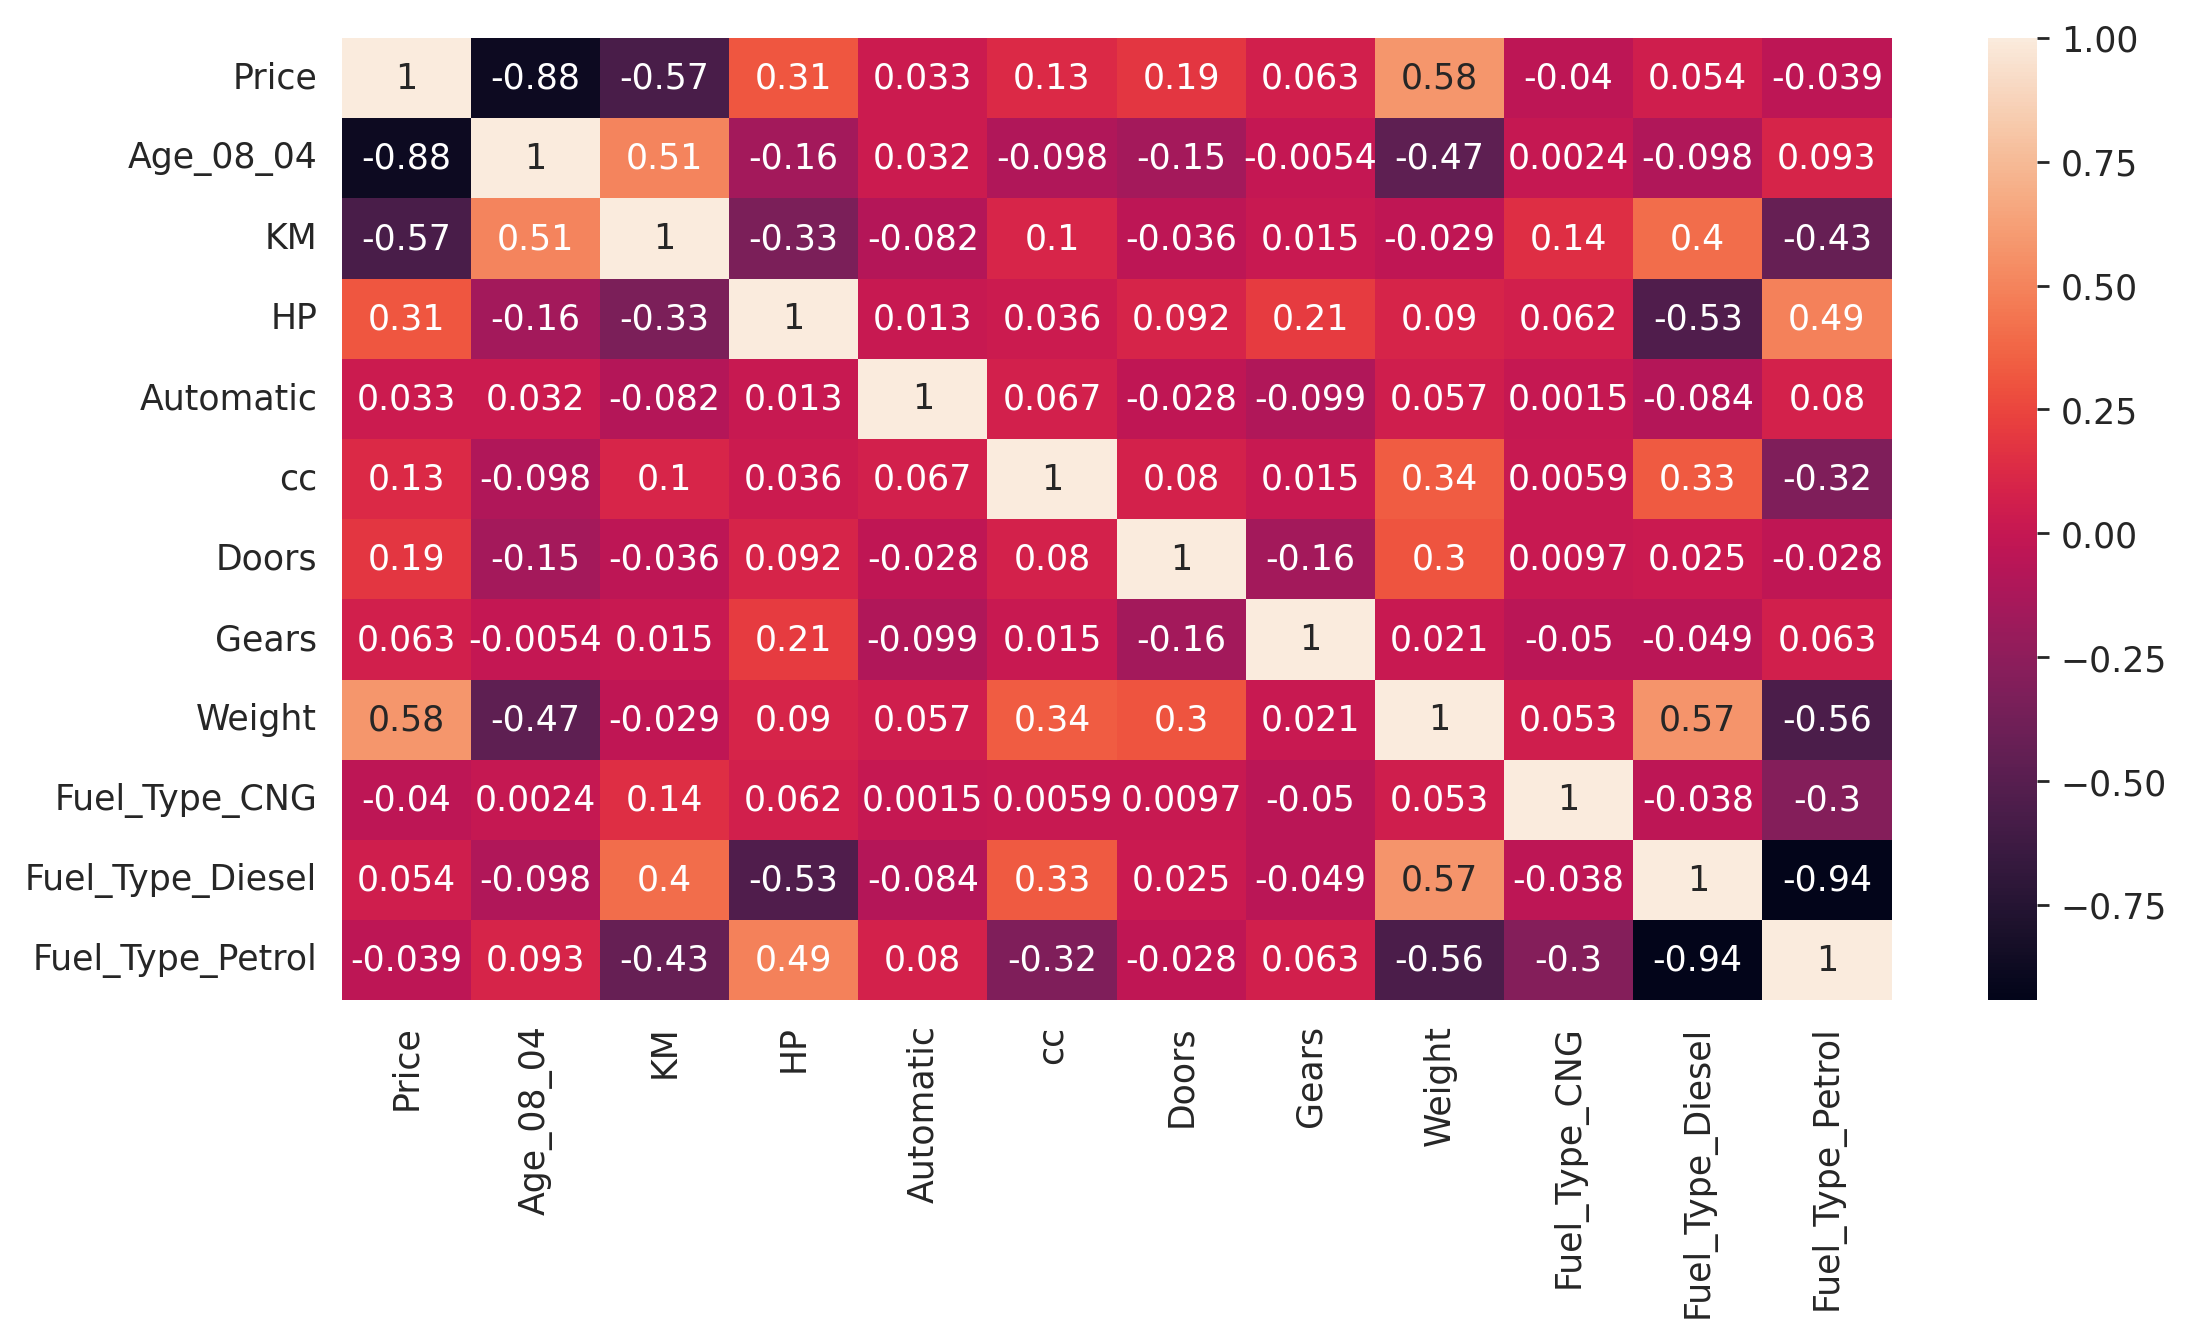

In [10]:
sns.heatmap(df.corr(), annot=True)

Data splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df.shape

(1436, 12)

In [13]:
x=df.iloc[:,1:12] #assign column from 1 to 11 in x
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,0,1
1432,72,19000,86,0,1300,3,5,1015,0,0,1
1433,71,17016,86,0,1300,3,5,1015,0,0,1
1434,70,16916,86,0,1300,3,5,1015,0,0,1


In [14]:
y=df.iloc[:,0] #price column as y
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [15]:
# Split the dataset into training (80%) and testing (20%) sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model 1: Basic Multiple Linear Regression

In [16]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [17]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)
ypred

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [18]:
#Intercept
lr.intercept_

-13821.299275879428

In [19]:
#coefficient
lr.coef_

array([-1.20830458e+02, -1.62314106e-02,  1.40394788e+01,  1.48830927e+02,
       -3.03721946e-02, -6.03109744e+01,  5.51600710e+02,  2.58849583e+01,
       -4.34086718e+02, -5.02635474e+02,  9.36722192e+02])

In [20]:
#Train and Test Accuracy
lr.score(x_train,y_train),lr.score(x_test,y_test) # here training accuracy is higher than test accuracy, that overfitted model

(0.8702643169608926, 0.8348888040611082)

Model 2: Multiple Linear Regression with Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Feature scaling
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


In [23]:
lr2 = LinearRegression()
lr2.fit(x_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred2 = lr2.predict(x_test_scaled)
y_pred2

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [25]:
#Intercept
lr2.intercept_

10754.395470383277

In [26]:
#coefficient
lr2.coef_

array([-2267.29478251,  -611.65441154,   208.34985789,    34.39712979,
         -14.16191663,   -57.46780385,   109.34041695,  1316.81831076,
         -77.89360121,  -226.08014485,   242.56040857])

Model 3: Multiple Linear Regression with Polynomial Features

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [29]:
# Initialize and fit the model
lr3 = LinearRegression()
lr3.fit(x_train_poly, y_train)

LinearRegression()

In [30]:
y_pred3 = lr3.predict(x_test_poly)
y_pred3

array([10630.98768399,  8855.42339599,  9574.1060644 ,  8874.07614201,
        9816.93224213,  8110.11739604,  8821.12967919,  8033.02998746,
       13568.94320741, 12714.05552086,  9548.49137278,  9017.73475398,
       12479.32238417, 12118.80361758,  9629.84326478,  8667.16787002,
       11463.10587719, 18601.38675524,  7636.73587129,  8996.09939932,
       12299.20970872, 18771.773041  ,  7761.27590792, 10067.53006102,
        8316.28992874, 16526.00038407,  9881.31700815,  7609.60925372,
       15695.95677632, 14007.50528151,  8196.09519251,  9190.6868415 ,
        8493.24021846,  9905.03011216, 10008.33721844,  8037.47123761,
        8870.86439442,  9782.64968194, 16533.31866053,  9386.85208238,
        9575.84960364,  9296.63201428,  8013.41274189,  6733.92769046,
        7821.00545227, 18612.28850051,  9302.50949516, 10413.98271417,
        8938.56895514, 12996.7698137 , 12586.20545217,  7526.57634859,
       15117.32531572, 16442.66759439,  7230.52521829,  7962.72472863,
      

In [31]:
lr3.coef_

array([-2.05686148e-02, -1.22320116e+02, -1.60659753e-01, -3.69891519e+03,
        8.98041381e+03,  1.48377552e+02, -2.37455663e+04,  1.84215888e+05,
        1.02559621e+03, -5.64829306e+01,  1.15495188e+04, -1.14930359e+04,
        1.12042638e-02,  3.93205899e-04,  5.81491898e-01,  1.01592698e+01,
       -9.55406120e-02,  1.31126198e+01,  1.95685080e+02, -8.17721436e-01,
       -4.34019433e+01,  1.23040048e+01, -9.05179802e+01, -8.75017232e-08,
       -2.37716560e-04, -2.42597592e-03,  1.99005434e-06, -3.43816979e-03,
       -1.69870485e-03,  2.07790330e-04, -6.38777426e-02, -5.66789335e-02,
       -3.88627752e-02,  5.00895767e-01, -2.09014489e+02, -6.31216531e-02,
       -1.18888853e+01,  4.78487792e+02,  8.42290215e-02, -6.21312290e+03,
        1.29672556e+03,  1.21748488e+03,  8.98041459e+03,  1.48740167e+01,
       -3.00860476e+02, -5.70626640e+03, -4.91894821e+00, -6.43790536e+03,
        1.90425453e-10,  1.54183200e+04, -1.50569662e-03, -3.54691603e-01,
       -4.07639846e+00,  

In [32]:
lr3.intercept_

-1160295.7831959906

Lasso and Ridge Regression

Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

In [34]:
# Initialize and fit the Lasso model
lasso = Lasso(alpha=1.0)
lasso.fit(x_train_scaled, y_train)

Lasso()

In [35]:
y_pred_lasso = lasso.predict(x_test_scaled)
y_pred_lasso

array([11137.66909715,  8973.84848231,  9286.4809822 ,  8953.52040937,
       10083.65343627,  7959.64817725,  8658.23228735,  8254.57788652,
       14064.35124299, 13100.92298011,  9551.20831578,  9324.21209533,
       12920.29167934, 12925.34692731,  9792.11413007,  8305.93482876,
       12190.1160343 , 17532.39840761,  7467.72445169,  9148.47373202,
       12638.32201466, 17801.91838862,  7902.58773856, 10386.34809111,
        7582.27095336, 16057.23066408, 10030.87136715,  7411.0652941 ,
       15763.6897053 , 14441.74838343,  8163.15544581,  9613.64243448,
        8511.52534194, 10097.965325  , 10245.02511472,  8072.51647298,
        8761.36451895,  9965.19314103, 16469.18213078,  9624.90644347,
        9829.44622252,  9502.93020292,  7889.71832659,  5697.41839757,
        6870.3388172 , 17263.03203884,  9440.57035702, 10703.08294104,
        8748.82173588, 13430.27309776, 12940.11465402,  6393.50311821,
       15069.11805864, 16369.02589762,  6193.84351273,  7784.37127305,
      

In [36]:
lasso.coef_

array([-2267.00560034,  -612.20834247,   209.00759728,    33.70146509,
         -12.86982056,   -55.7254473 ,   108.68170229,  1313.09530302,
         -51.5376463 ,  -157.0538691 ,   312.06967049])

In [37]:
lasso.intercept_

10754.395470383277

Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)

Ridge()

In [41]:
y_pred_ridge = ridge.predict(x_test_scaled)
y_pred_ridge

array([11138.07114872,  8975.47065249,  9284.45759566,  8954.03106732,
       10084.10869459,  7960.92009848,  8658.5186928 ,  8257.49000145,
       14061.78095411, 13099.93818744,  9551.40594158,  9326.38953533,
       12918.82521282, 12924.20670154,  9792.99123876,  8306.25655271,
       12188.9825836 , 17530.19569082,  7468.51443919,  9149.29335955,
       12637.5814494 , 17800.0805706 ,  7905.42910548, 10386.72620897,
        7580.56189366, 16055.88161992, 10033.34076992,  7412.0571832 ,
       15761.70339934, 14439.77620814,  8165.04757926,  9612.9563711 ,
        8512.5022979 , 10098.84005891, 10246.13291467,  8074.75205787,
        8761.32727275,  9966.14914966, 16466.56373318,  9623.75957014,
        9831.06218584,  9504.61208547,  7890.87660762,  5696.52301596,
        6871.30232526, 17260.6798358 ,  9441.86171205, 10702.47801466,
        8749.26196969, 13429.51857467, 12940.43858852,  6395.16940472,
       15066.6143631 , 16370.0319036 ,  6193.44318763,  7785.07089877,
      

In [42]:
ridge.coef_

array([-2265.12495444,  -613.17859394,   209.90676652,    34.63139741,
         -14.10453667,   -56.60725702,   109.34737506,  1314.19660588,
         -78.01790038,  -224.24038969,   240.86060313])

In [43]:
ridge.intercept_

10754.395470383277


Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
Answer:
Normalization scales data to a range of [0, 1] or [-1, 1], making it useful for algorithms that require a bounded input.
Standardization scales data to have a mean of 0 and a standard deviation of 1, making it useful for algorithms that assume data is normally distributed.
Both techniques help improve model performance by ensuring all features contribute equally.


2.What techniques can be used to address multicollinearity in multiple linear regression?
Answer:
Variance Inflation Factor (VIF): Identify and remove highly collinear variables.
Principal Component Analysis (PCA): Reduce the dimensionality of the dataset.
Regularization techniques: Apply Lasso or Ridge regression to penalize large coefficients.
